In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv("/content/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,...,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000
mean,8009.996822,-0.216230,0.277097,0.889505,0.282606,-0.086585,0.139986,-0.121943,-0.048727,0.911579,...,-0.061474,-0.153850,-0.033709,0.017113,0.104794,0.062891,0.008320,0.000271,62.352617,0.004349
std,6204.332248,1.583914,1.308884,1.331824,1.478162,1.191776,1.306285,1.153899,1.246823,1.192349,...,0.918705,0.626631,0.505355,0.591394,0.429413,0.561603,0.405100,0.261230,178.247010,0.065803
min,0.000000,-27.670569,-34.607649,-22.804686,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2542.000000,-0.978944,-0.261503,0.417186,-0.622456,-0.688114,-0.622521,-0.591335,-0.185243,0.196741,...,-0.268151,-0.543613,-0.171833,-0.333251,-0.144092,-0.353864,-0.080064,-0.015461,5.000000,0.000000
50%,6662.000000,-0.340742,0.256346,0.951223,0.213029,-0.183847,-0.146903,-0.094876,0.013616,0.894911,...,-0.130062,-0.124900,-0.044299,0.072099,0.143136,0.001972,-0.003039,0.015452,15.950000,0.000000
75%,12382.000000,1.161273,0.883626,1.613678,1.159141,0.346298,0.508432,0.431657,0.267560,1.589120,...,0.021687,0.234029,0.075686,0.401798,0.380076,0.409231,0.106344,0.073171,50.000000,0.000000
max,20642.000000,1.960497,9.092123,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [6]:
print("Fraud")
print(df.Time[df.Class == 1].describe())
print()
print("Normal")
print(df.Time[df.Class == 0].describe())

Fraud
count       52.000000
mean     11569.615385
std       4973.192986
min        406.000000
25%       8040.250000
50%      11086.000000
75%      16159.500000
max      20451.000000
Name: Time, dtype: float64

Normal
count    11906.000000
mean      7993.389048
std       6204.041605
min          0.000000
25%       2524.500000
50%       6603.000000
75%      12353.750000
max      20638.000000
Name: Time, dtype: float64


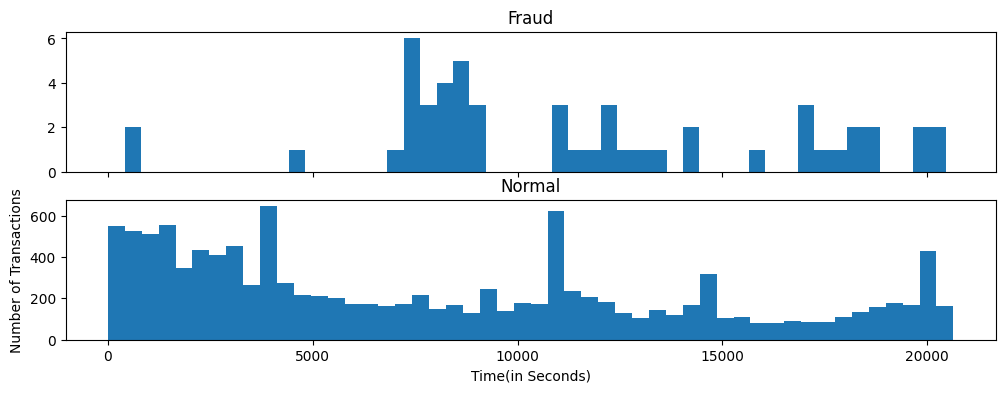

In [7]:
f,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(12,4))

bins =50
ax1.hist(df.Time[df.Class==1],bins=bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class==0],bins=bins)
ax2.set_title('Normal')

plt.xlabel('Time(in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()


In [8]:
print('Fraud')
print(df.Amount[df.Class==1].describe())
print()
print("Normal")
print(df.Amount[df.Class == 0].describe())

Fraud
count      52.000000
mean       97.724808
std       321.188775
min         0.000000
25%         1.000000
50%         1.000000
75%         1.772500
max      1809.680000
Name: Amount, dtype: float64

Normal
count    11906.000000
mean        62.198127
std        177.379105
min          0.000000
25%          5.292500
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64


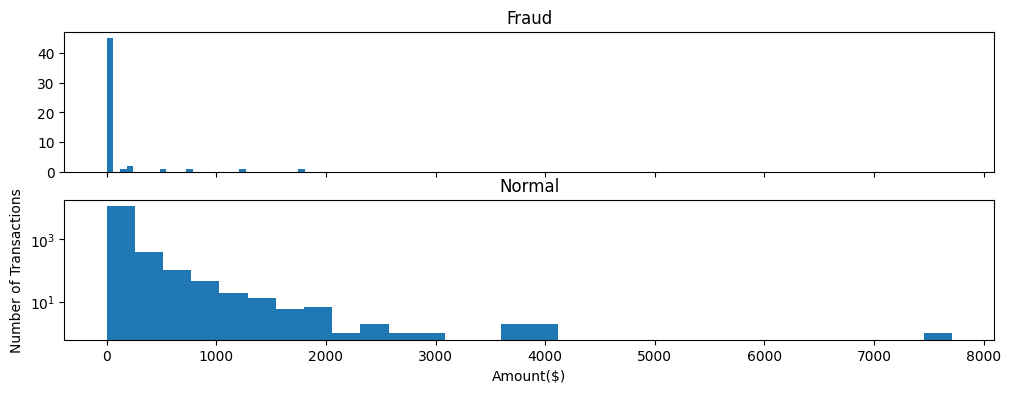

In [9]:
f, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(12,4))

bins=30

ax1.hist(df.Amount[df.Class == 1],bins =bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0],bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [10]:
df['Amount_max_fraud'] = 1
df.loc[df.Amount <=2125.87, 'Amount_max_fraud'] =0

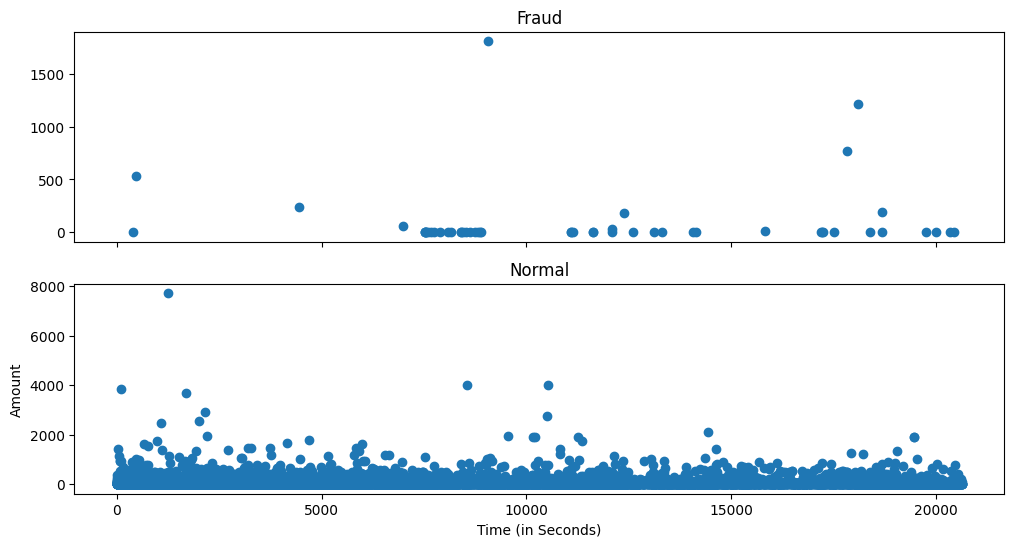

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [12]:
v_features = df.iloc[:, 1:29].columns


<ipython-input-13-27273b2c1b1c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.Class ==1], bins=50)
<ipython-input-13-27273b2c1b1c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.Class ==0], bins=50)
<ipython-input-13-27273b2c1b1c>:5: UserWarning: 

`distplot` is a deprec

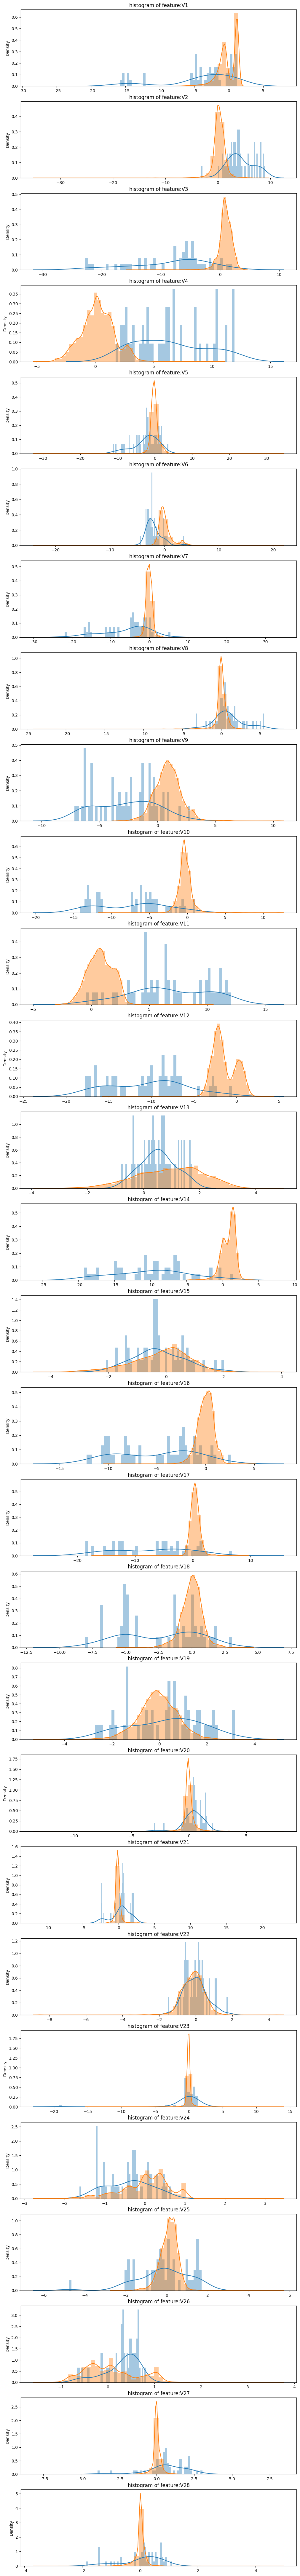

In [13]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i,cn in enumerate(df[v_features]):
  ax = plt.subplot(gs[i])
  sns.distplot(df[cn][df.Class ==1], bins=50)
  sns.distplot(df[cn][df.Class ==0], bins=50)
  ax.set_xlabel('')
  ax.set_title('histogram of feature:' +str(cn))
plt.show()

In [14]:
df['V1_'] = df.V1.map(lambda x: 1 if x < -3 else 0)
df['V2_'] = df.V2.map(lambda x: 1 if x > 2.5 else 0)
df['V3_'] = df.V3.map(lambda x: 1 if x < -4 else 0)
df['V4_'] = df.V4.map(lambda x: 1 if x > 2.5 else 0)
df['V5_'] = df.V5.map(lambda x: 1 if x < -4.5 else 0)
df['V6_'] = df.V6.map(lambda x: 1 if x < -2.5 else 0)
df['V7_'] = df.V7.map(lambda x: 1 if x < -3 else 0)
df['V9_'] = df.V9.map(lambda x: 1 if x < -2 else 0)
df['V10_'] = df.V10.map(lambda x: 1 if x < -2.5 else 0)
df['V11_'] = df.V11.map(lambda x: 1 if x > 2 else 0)
df['V12_'] = df.V12.map(lambda x: 1 if x < -2 else 0)
df['V14_'] = df.V14.map(lambda x: 1 if x < -2.5 else 0)
df['V16_'] = df.V16.map(lambda x: 1 if x < -2 else 0)
df['V17_'] = df.V17.map(lambda x: 1 if x < -2 else 0)
df['V18_'] = df.V18.map(lambda x: 1 if x < -2 else 0)
df['V19_'] = df.V19.map(lambda x: 1 if x > 1.5 else 0)

In [15]:
df.loc[df.Class == 0, 'Normal'] = 1
df.loc[df.Class == 1, 'Normal'] = 0

In [16]:
df= df.rename(columns={'Class':'Fraud'})

In [17]:
print(df.Normal.value_counts())
print()
print(df.Fraud.value_counts())

Normal
1.0    11906
0.0       52
Name: count, dtype: int64

Fraud
0.0    11906
1.0       52
Name: count, dtype: int64


In [18]:
pd.set_option("display.max_columns",101)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud,Amount_max_fraud,V1_,V2_,V3_,V4_,V5_,V6_,V7_,V9_,V10_,V11_,V12_,V14_,V16_,V17_,V18_,V19_,Normal
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0


In [19]:
Fraud = df[df.Fraud == 1]
Normal = df[df.Normal == 1]

In [20]:
X_train = Fraud.sample(frac=0.8)
count_Frauds = len(X_train)

X_train = pd.concat([X_train, Normal.sample(frac = 0.8)], axis = 0)

X_test = df.loc[~df.index.isin(X_train.index)]

In [21]:
X_train = shuffle(X_train)
X_test = shuffle(X_test)

In [22]:
y_train = X_train.Fraud
y_train = pd.concat([y_train, X_train.Normal], axis=1)

y_test = X_test.Fraud
y_test = pd.concat([y_test, X_test.Normal], axis=1)

In [23]:
X_train = X_train.drop(['Fraud','Normal'], axis = 1)
X_test = X_test.drop(['Fraud','Normal'], axis = 1)

In [24]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

9567
9567
2392
2392


In [25]:
ratio = len(X_train)/count_Frauds

y_train.Fraud *= ratio
y_test.Fraud *= ratio

In [26]:
features = X_train.columns.values
for feature in features:
  mean, std = df[feature].mean(), df[feature].std()
  X_train.loc[:, feature]= (X_train[feature]-mean) / std
  X_test.loc[:, feature]= (X_train[feature]-mean) / std

In [27]:
split = int(len(y_test)/2)
inputX = X_train.values
inputY = y_train.values
inputX_valid = X_test.values[:split]
inputY_valid = y_test.values[:split]
inputX_test = X_test.values[split:]
inputY_test = y_test.values[split:]

In [28]:
import tensorflow as tf

pkeep = tf.keras.Input(shape=(), dtype=tf.float32)


In [29]:
input_nodes = 37
multiplier = 1.5
hidden_nodes1 = 18
hidden_nodes2 = round(hidden_nodes1*multiplier)
hidden_nodes3 = round(hidden_nodes2 * multiplier)
pkeep = tf.keras.Input(shape=(), dtype=tf.float32)

In [30]:
import tensorflow as tf

input_nodes = 10  # Update with the actual number of input nodes

# Define input layer
x = tf.keras.Input(shape=(input_nodes,), dtype=tf.float32)

# Define dropout rate
# Define dropout rate as scalar tensor
pkeep = tf.Variable(0.5, dtype=tf.float32, trainable=False)


# layer 1
hidden_nodes1 = 18
W1 = tf.Variable(tf.random.truncated_normal([input_nodes, hidden_nodes1], stddev=0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

# layer 2
hidden_nodes2 = 27
W2 = tf.Variable(tf.random.truncated_normal([hidden_nodes1, hidden_nodes2], stddev=0.15))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1, W2) + b2)

# layer 3
hidden_nodes3 = 40
W3 = tf.Variable(tf.random.truncated_normal([hidden_nodes2, hidden_nodes3], stddev=0.15))
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.sigmoid(tf.matmul(y2, W3) + b3)
y3 = tf.nn.dropout(y3, rate=1-pkeep)

# layer 4
W4 = tf.Variable(tf.random.truncated_normal([hidden_nodes3, 2], stddev=0.15))
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)

# output
y = y4
y_ = tf.keras.Input(shape=(2,), dtype=tf.float32)


In [31]:
training_epochs = 5 # should be 2000, it will timeout when uploading
training_dropout = 0.9
display_step = 1 # 10
n_samples = y_train.shape[0]
batch_size = 2048
learning_rate = 0.005

In [32]:
# Cost function: Cross Entropy
def compute_loss():
    return -tf.reduce_sum(y_ * tf.math.log(y))

# We will optimize our model via AdamOptimizer
optimizer = tf.optimizers.Adam(learning_rate)

# Training step function
@tf.function
def train_step(x, y_):
    with tf.GradientTape() as tape:
        y = model(x)
        loss = compute_loss(y, y_)
    gradients = tape.gradient(loss, [W_hidden, b_hidden, W_output, b_output])
    optimizer.apply_gradients(zip(gradients, [W_hidden, b_hidden, W_output, b_output]))
    return loss

# Correct prediction if the most likely value (Fraud or Normal) from softmax equals the target value.
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [33]:
tsne_data = pd.read_csv("/content/creditcard.csv")

In [34]:
df2 = tsne_data[tsne_data.Class == 1]
df2 = pd.concat([df2, tsne_data[tsne_data.Class == 0].sample(n = 10000)], axis = 0)

In [35]:
#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
df2_std = standard_scaler.fit_transform(df2)

#Set y equal to the target values.
y = df2.loc[:,'Class'].values

In [36]:
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df2_std)

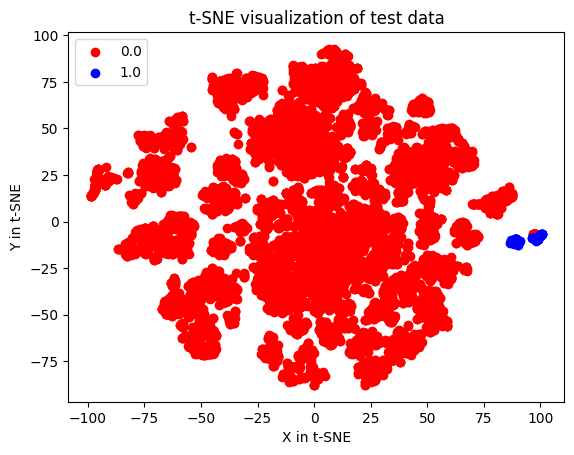

In [43]:
color_map = {0:'red', 1:'blue'}
plt.figure()
for idx,cl in enumerate(np.unique(y)):
  plt.scatter(x = x_test_2d[y==cl,0],
              y = x_test_2d[y==cl,1],
              c = color_map[idx],
              label = cl)

plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()


In [39]:
df_used_std= Fraud
df_used = pd.concat([df_used_std,Normal.sample(n = 10000)], axis = 0)

In [40]:
#Scale features to improve the training ability of TSNE.
df_used_std = standard_scaler.fit_transform(df_used)

#Set y_used equal to the target values.
y_used = df_used.iloc[:,-1].values

In [41]:
x_test_2d_used = tsne.fit_transform(df_used_std)

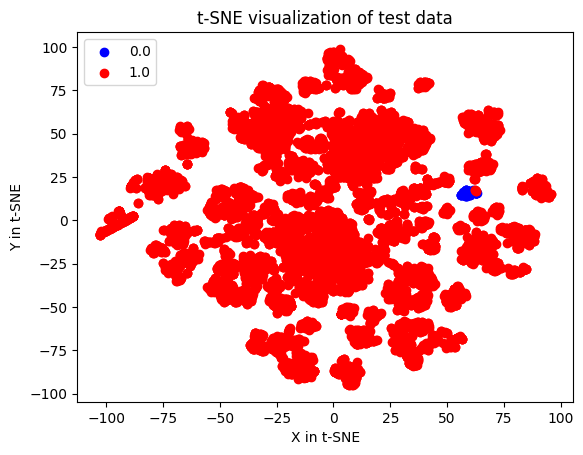

In [42]:
color_map = {1:'red', 0:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y_used)):
    plt.scatter(x=x_test_2d_used[y_used==cl,0],
                y=x_test_2d_used[y_used==cl,1],
                c=color_map[idx],
                label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()